In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\yang\Documents\Downloads\Results_21Mar2022.csv'

df = pd.read_csv(file_path)

df

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,...,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,...,8.167013,0.632547,0.146827,283.883428,249.472563,8.231176,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,...,8.467858,0.601941,0.130298,270.247108,277.927269,7.947014,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,...,8.107006,0.572941,0.119872,252.415063,275.760515,8.103589,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,...,9.514028,0.509689,0.104731,209.566722,310.422445,8.712428,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,...,9.258068,0.609398,0.113401,264.599257,315.922570,8.616601,492,female,fish,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie_male_30-39,6.615301,11.385959,13374.38105,18.283800,1.769398,0.482313,641.918305,560.925069,...,6.829520,1.524615,0.269856,610.318478,268.939576,8.510504,1221,male,veggie,30-39
71996,1000,veggie_male_40-49,6.185949,10.566347,12959.68443,17.342092,1.605406,0.446074,580.913591,527.860144,...,6.369390,1.430116,0.252651,570.034533,262.366892,7.988943,961,male,veggie,40-49
71997,1000,veggie_male_50-59,5.871454,9.806539,11924.19092,16.625511,1.468003,0.431966,533.784777,487.176818,...,6.266982,1.381163,0.274705,559.427383,241.645519,7.780208,426,male,veggie,50-59
71998,1000,veggie_male_60-69,5.922496,9.873027,11310.87733,16.531075,1.492114,0.437879,545.453273,487.030916,...,6.240777,1.435583,0.276000,582.000324,244.768887,7.779582,229,male,veggie,60-69


# Step 1: Data preprocessing

### Prepare data  
In this task, I will pay more attention to the differences between different groups rather than the differences within a certain group.  
so I decided to drop sd_data at the beginning

In [2]:
columns_to_drop = [
    'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut',
    'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio',
    'sd_watuse', 'sd_acid'
]
df_selected = df.drop(columns=columns_to_drop)
df_selected

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,492,female,fish,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1000,veggie_male_30-39,6.615301,11.385959,13374.38105,18.283800,1.769398,0.482313,641.918305,560.925069,21.075983,1221,male,veggie,30-39
71996,1000,veggie_male_40-49,6.185949,10.566347,12959.68443,17.342092,1.605406,0.446074,580.913591,527.860144,20.225756,961,male,veggie,40-49
71997,1000,veggie_male_50-59,5.871454,9.806539,11924.19092,16.625511,1.468003,0.431966,533.784777,487.176818,19.625305,426,male,veggie,50-59
71998,1000,veggie_male_60-69,5.922496,9.873027,11310.87733,16.531075,1.492114,0.437879,545.453273,487.030916,19.936478,229,male,veggie,60-69


## Exploratory data analysis  
### Feature Selection
Heat map for correlation analysis between features

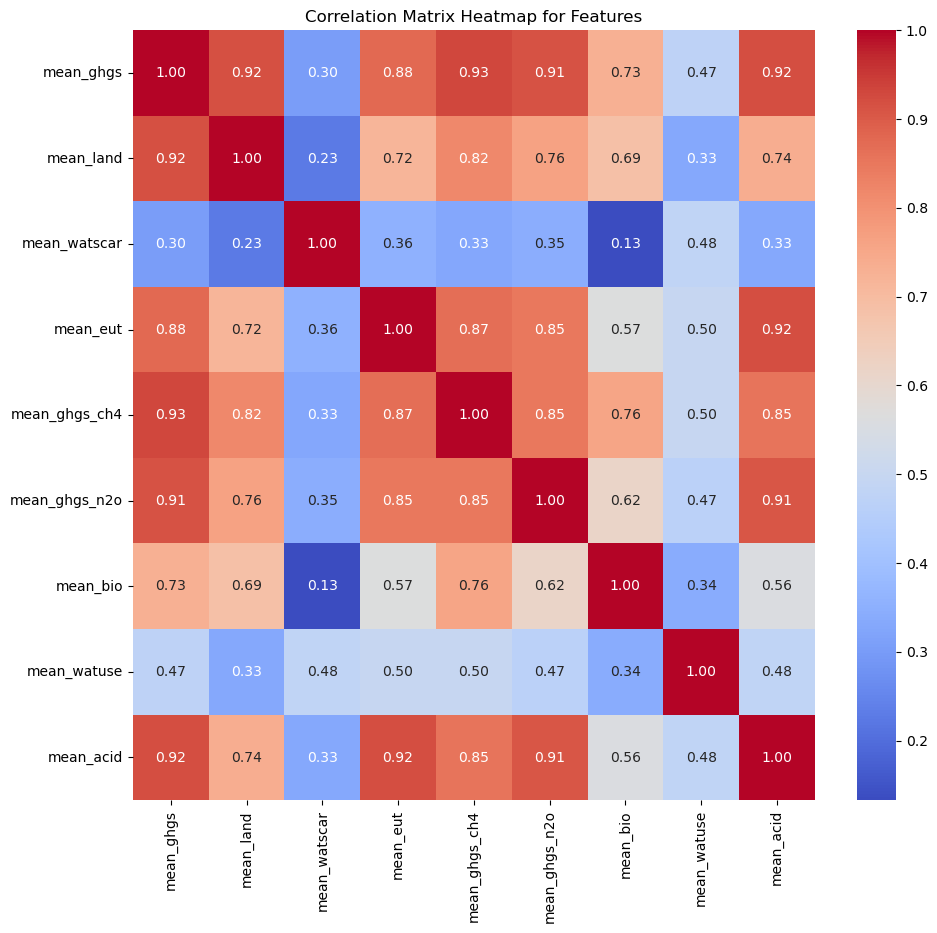

In [3]:
columns_to_drop2 = ["mc_run_id","grouping","n_participants","sex","diet_group","age_group"]
df_features = df_selected.drop(columns=columns_to_drop2)
correlation_matrix = df_features.corr()

plt.figure(figsize=(11, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Features')
plt.show()

**Correlation analysis between featurels**  
Calculate and visualise the correlation between each feature

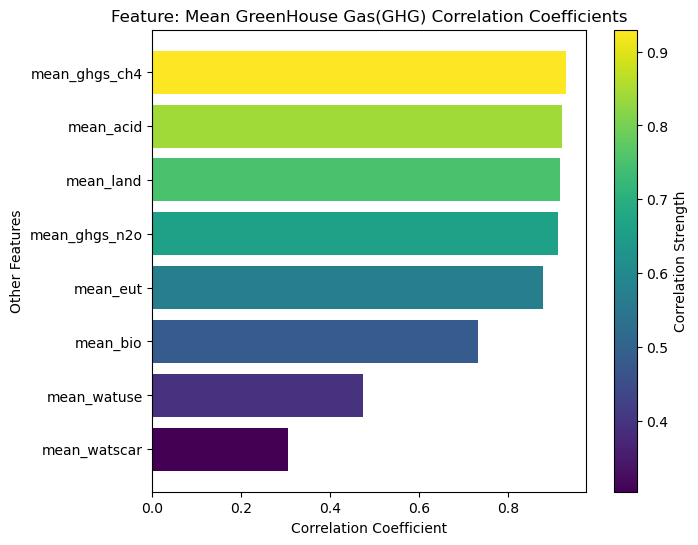

In [5]:
# Sort the correlation
target = 'mean_ghgs'
features = df_features.drop(columns=target) 

# Calculate the correlation of all other features with mean_ghgs
feature_target_correlation = features.corrwith(df_selected[target])

correlation_sorted = feature_target_correlation.sort_values()

colors = plt.cm.viridis(np.linspace(0, 1, len(correlation_sorted)))

fig, ax = plt.subplots(figsize=(7, 6))

for idx, value in enumerate(correlation_sorted):
    ax.barh(idx, value, color=colors[idx])

ax.set_yticks(range(len(correlation_sorted)))
ax.set_yticklabels(correlation_sorted.index)

ax.set_title('Feature: Mean GreenHouse Gas(GHG) Correlation Coefficients')
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Other Features')

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=correlation_sorted.min(), vmax=correlation_sorted.max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Correlation Strength')

plt.show()

Sort correlation coefficients by absolute value.  
If the absolute value of the correlation coefficient is more than **0.85**, we consider they are strongly related.  
Therefore, retaining the mean_ghgs features is sufficient to replace them

C:\Users\yang\AppData\Local\Temp\ipykernel_9432\2037049722.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Correlation Strength')


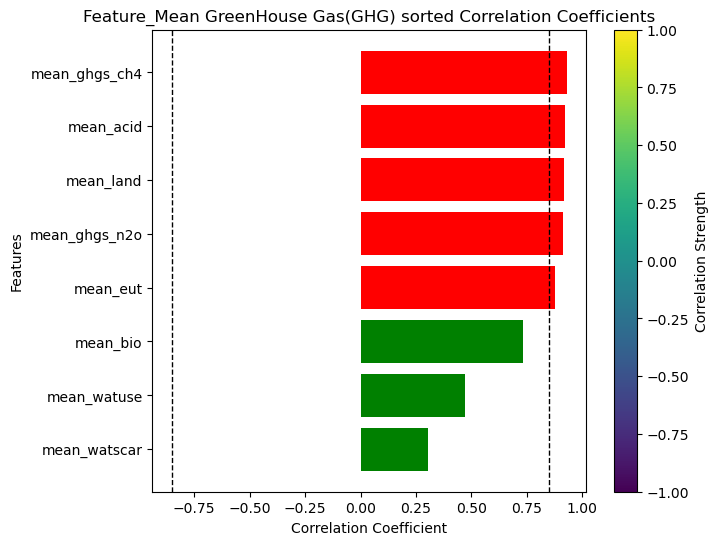

In [6]:
correlation_sorted_abs = correlation_sorted.abs().sort_values(ascending=True)
correlation_sorted_by_abs = correlation_sorted[correlation_sorted_abs.index]

plt.figure(figsize=(7, 6))

threshold = 0.85
for idx, (feature, value) in enumerate(correlation_sorted_by_abs.items()):
    color = 'green' if abs(value) < threshold else 'red'
    plt.barh(idx, value, color=color)

plt.yticks(range(len(correlation_sorted_by_abs)), correlation_sorted_by_abs.index)
plt.title('Feature_Mean GreenHouse Gas(GHG) sorted Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

plt.axvline(x=threshold, color='black', linestyle='--', lw=1)
plt.axvline(x=-threshold, color='black', linestyle='--', lw=1)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
plt.colorbar(sm, label='Correlation Strength')

plt.show()


**Visualize the selection process**  
Confirm whether the features to be discarded are really strongly related

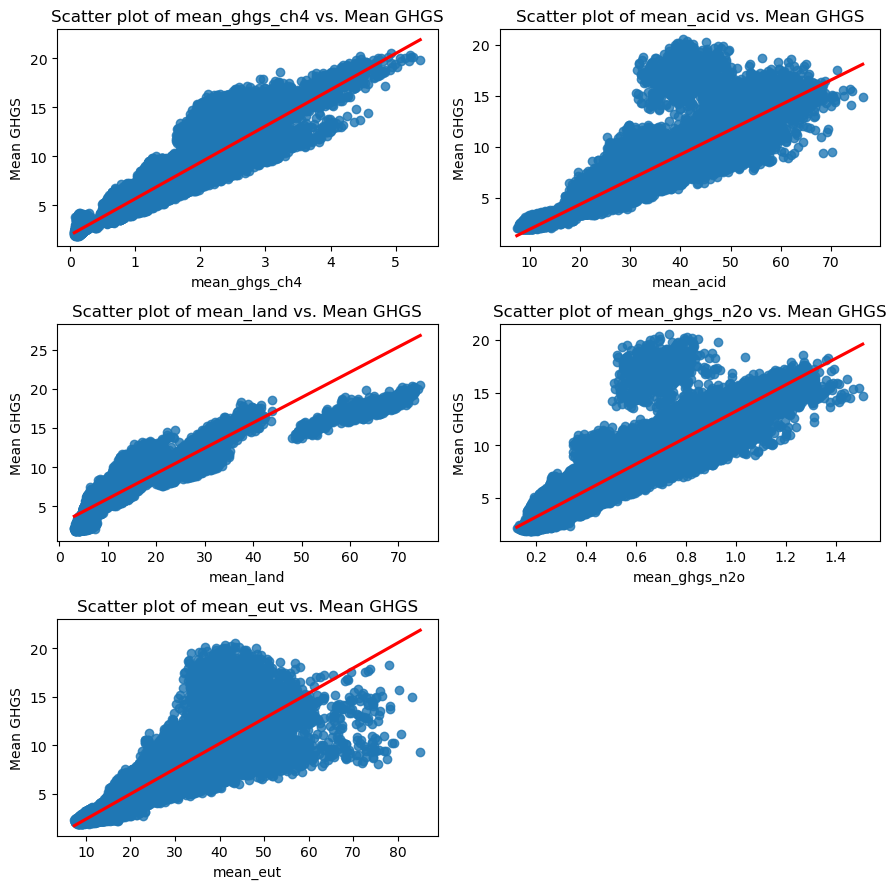

In [7]:
correlation_sorted_abs = correlation_sorted.abs().sort_values(ascending=False)
correlation_sorted_by_abs = correlation_sorted[correlation_sorted_abs.index]

# get 5 sorted highest_correlation_features
highest_correlation_features = correlation_sorted_by_abs.head(5).index

n_features = len(highest_correlation_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 9))
axes = axes.flatten()

for i, feature in enumerate(highest_correlation_features):
    sns.regplot(x=feature, y='mean_ghgs', data=df_selected, ax=axes[i], line_kws={'color': 'red'}, ci=90)
    axes[i].set_title(f'Scatter plot of {feature} vs. Mean GHGS')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Mean GHGS')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Discard the five features that are strongly correlated (0.88) with mean_ghgs  
"mean_ghgs_ch4","mean_ghgs_n2o","mean_land","mean_eut","mean_acid"  
and draw heat maps of the remaining four features

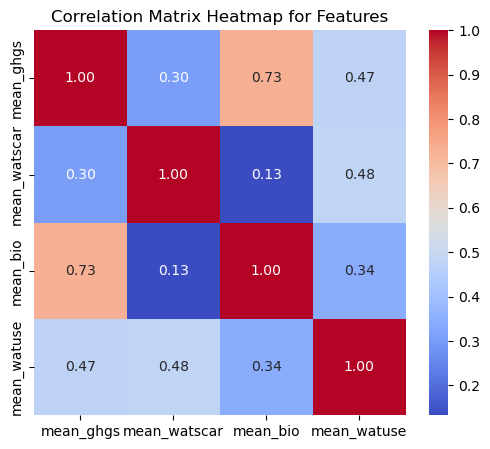

In [8]:
columns_to_drop3 = ["mean_ghgs_ch4","mean_ghgs_n2o","mean_land","mean_eut","mean_acid"]
df_after_selection = df_features.drop(columns=columns_to_drop3)
correlation_matrix = df_after_selection.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Features')
plt.show()

In [9]:
columns_to_add_back = ["grouping", "sex", "diet_group", "age_group"]
df_non_features = df_selected[columns_to_add_back]

df_final = pd.concat([df_after_selection, df_non_features], axis=1)
df_final

,mean_ghgs,mean_watscar,mean_bio,mean_watuse,grouping,sex,diet_group,age_group
0,5.421821,14165.86240,476.270413,679.923479,fish_female_20-29,female,fish,20-29
1,5.436673,15222.77063,467.923201,709.343785,fish_female_30-39,female,fish,30-39
2,5.289333,15818.80068,438.659832,707.925368,fish_female_40-49,female,fish,40-49
3,5.169020,16962.06009,395.787622,720.825105,fish_female_50-59,female,fish,50-59
4,5.380268,18212.66232,421.176867,749.392826,fish_female_60-69,female,fish,60-69
...,...,...,...,...,...,...,...,...
71995,6.615301,13374.38105,641.918305,560.925069,veggie_male_30-39,male,veggie,30-39
71996,6.185949,12959.68443,580.913591,527.860144,veggie_male_40-49,male,veggie,40-49
71997,5.871454,11924.19092,533.784777,487.176818,veggie_male_50-59,male,veggie,50-59
71998,5.922496,11310.87733,545.453273,487.030916,veggie_male_60-69,male,veggie,60-69


### Feature engineering  
Direct PCA proved to be a **failed approach**

In [13]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Using only the remaining four numerical features
# numerical_features = df_final.select_dtypes(include=[np.number])

# scaler = StandardScaler()
# numerical_features_scaled = scaler.fit_transform(numerical_features)

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(numerical_features_scaled)

# # pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# # pca_df['grouping'] = df_final['grouping']

# # plt.figure(figsize=(10, 8))
# # sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='grouping', data=pca_df, palette="viridis")
# # plt.title('PCA Result of df_final')
# # plt.xlabel('Principal Component 1')
# # plt.ylabel('Principal Component 2')
# # plt.legend(title='Grouping', bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.grid(True)
# # plt.show()

# # Print the importance of each principal component
# print("Explained variance ratio:", pca.explained_variance_ratio_)

# # Check how the two principal components come from, that is, the proportion of each feature
# loadings = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=numerical_features.columns)

# print("Loadings of principal components:")
# print(loadings)

### Inspired by PCA loadings  
Compared to the principal components of PCA which are not **explanatory**  
This is actually we can create two axes, one axis represents water resources, and the other axis represents greenhouse gases and biodiversity

### Deal with 'mean_ghgs' and  'mean_bio' (Combine them into GHG_Bio score)
#### First observe whether their distribution is Gaussian distribution, and then choose the normalization method.

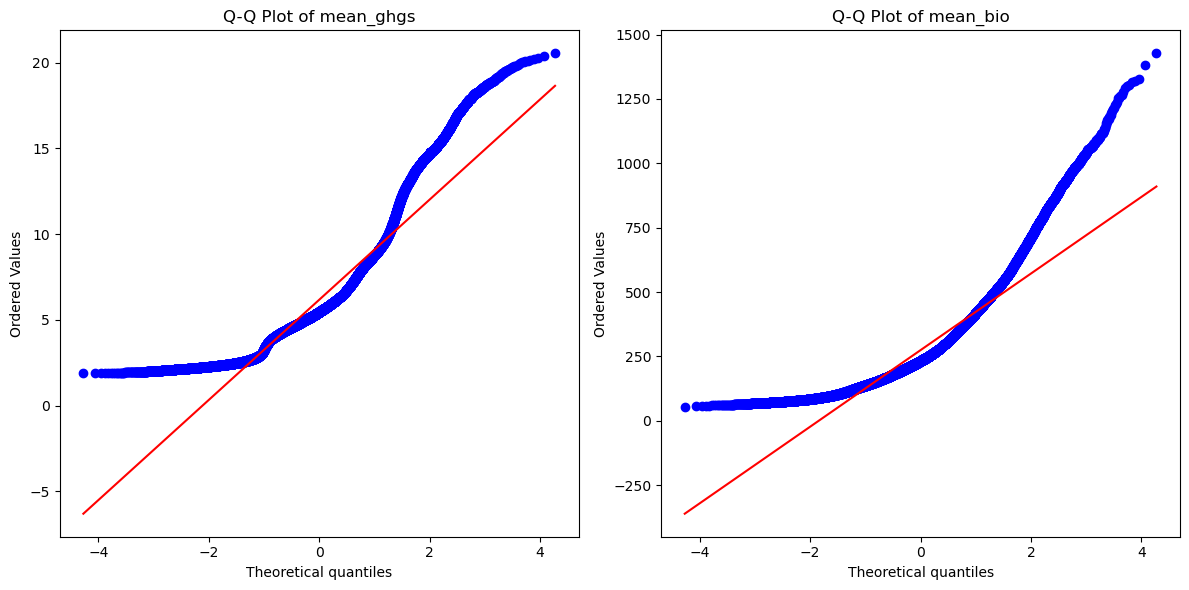

In [15]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

z_scores_ghgs = stats.zscore(df_final['mean_ghgs'])
# Generating Artificially Normally Distributed Data for mean_ghgs
theoretical_qq_ghgs = np.sort(stats.norm.rvs(size=len(df_final['mean_ghgs'])))

z_scores_bio = stats.zscore(df_final['mean_bio'])
# Generating Artificially Normally Distributed Data for mean_bio
theoretical_qq_bio = np.sort(stats.norm.rvs(size=len(df_final['mean_bio'])))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

stats.probplot(df_final['mean_ghgs'], dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot of mean_ghgs')

stats.probplot(df_final['mean_bio'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of mean_bio')

plt.tight_layout()
plt.show()

**None of them are normal distributions, so max-min will be used for normalization instead of the previous standardization.**  
And Principal component proportion 0.884 is enough

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# First select the two features you want to process and fuse them into GHG_Bio
ghg_bio_features = df_after_selection[['mean_ghgs', 'mean_bio']]

# Max-Min
min_max_scaler = MinMaxScaler()

ghg_bio_scaled = min_max_scaler.fit_transform(ghg_bio_features)

# Apply PCA to reduce to 1 dimension
pca = PCA(n_components=1)
ghg_bio_pca = pca.fit_transform(ghg_bio_scaled)

# Set GHG_Bio score as X-axis
x_axis = ghg_bio_pca.flatten()

# Principal component proportion 0.884 is enough
explained_variance_ratio = pca.explained_variance_ratio_[0]

loading_scores = pca.components_[0]

print("Explained variance ratio (component 1):", explained_variance_ratio)
print("Loading scores for component 1:", loading_scores)

Explained variance ratio (component 1): 0.8841288901188985
Loading scores for component 1: [0.85038861 0.52615513]


### Deal with 'mean_watscar' and 'mean_watuse'

In [17]:
from scipy.stats import pearsonr

corr_test = pearsonr(df_after_selection['mean_watscar'], df_after_selection['mean_watuse'])
print(f"Pearson correlation test result: Correlation = {corr_test[0]}, p-value = {corr_test[1]}")

Pearson correlation test result: Correlation = 0.48121784246750215, p-value = 0.0


In [20]:
import pingouin as pg
p_corr_watscar = pg.partial_corr(data=df_after_selection, x='mean_watscar',y= 'mean_ghgs' , 
                         covar=['mean_watuse', 'mean_bio'])

p_corr_watscar

,n,r,CI95%,p-val
pearson,72000,0.172099,"[0.17, 0.18]",0.0


In [21]:
p_corr_watscar = pg.partial_corr(data=df_after_selection, x='mean_watuse',y= 'mean_ghgs' , 
                         covar=['mean_watscar', 'mean_bio'])

p_corr_watscar

,n,r,CI95%,p-val
pearson,72000,0.246129,"[0.24, 0.25]",0.0


Calculate the partial correlation of the two water-related features and Mean_GHG respectively, and use the inverse partial correlation coefficient as a weight to combine the two water-related features.

In [29]:
# Partial correlation coefficient calculates inverse correlation weight
inverse_corr_weight_watscar = 1 - 0.172099
inverse_corr_weight_watuse = 1 - 0.246129

# Use total weights, normalize again
total_weight = inverse_corr_weight_watscar + inverse_corr_weight_watuse

weight_watscar = inverse_corr_weight_watscar / total_weight
weight_watuse = inverse_corr_weight_watuse / total_weight

# Get the y-axis, Water score
y_axis = weight_watscar * df_after_selection['mean_watscar'] + weight_watuse * df_after_selection['mean_watuse']
y_axis

0        7738.476999
1        8305.685482
2        8616.972172
3        9221.503259
4        9889.685028
            ...     
71995    7267.500366
71996    7034.689041
71997    6473.321099
71998    6152.242634
71999    6137.209367
Length: 72000, dtype: float64

The Y-axis is also standardized to facilitate subsequent comparisons.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select those two water-related features
water_features = df_after_selection[['mean_watscar', 'mean_watuse']]

# Again use Max-min
min_max_scaler = MinMaxScaler()
water_scaled = min_max_scaler.fit_transform(water_features)


y_axis = (water_scaled[:, 0] * weight_watscar + water_scaled[:, 1] * weight_watuse)
y_axis

array([0.16024192, 0.17533234, 0.18110928, ..., 0.10845423, 0.10226614,
       0.10559704])

#### Scale the normalized Y and X axes to 0-10 to facilitate visualization

In [31]:
min_max_scaler = MinMaxScaler(feature_range=(0, 10))
x_axis_scaled = min_max_scaler.fit_transform(ghg_bio_pca).flatten()

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
y_axis_scaled = min_max_scaler.fit_transform(y_axis.reshape(-1, 1)).flatten()

#### Complete data preprocessing and save the data.  
Here I keep it to three decimal places to facilitate subsequent statistics and visualization.  
**File name**: transformed_0_10_beau_data.csv 

In [32]:
df_transformed = pd.DataFrame({
    # GHG_Bio score
    'PCA_GHG_Bio': x_axis_scaled,  
    'Composite_Water':  y_axis_scaled,  # 新的水资源综合特征
    'grouping': df_selected['grouping'],  # 原始分类特征
    'sex': df_selected['sex'],
    'diet_group': df_selected['diet_group'],
    'age_group': df_selected['age_group']
})

# keep all digits
# df_transformed.to_csv('transformed_0_10_data.csv', index=False)

# to three decimal places
df_transformed.to_csv('transformed_0_10_beau_data.csv', index=False, float_format='%.3f')

df_transformed.head()

,PCA_GHG_Bio,Composite_Water,grouping,sex,diet_group,age_group
0,2.391977,1.919586,fish_female_20-29,female,fish,20-29
1,2.373160,2.101351,fish_female_30-39,female,fish,30-39
2,2.239470,2.170935,fish_female_40-49,female,fish,40-49
3,2.076057,2.332958,fish_female_50-59,female,fish,50-59
4,2.220378,2.536621,fish_female_60-69,female,fish,60-69


# Step 2 Early visualization  
Drawing scatterplots directly proves to be a failed visualization.  
Because this data design has 1000 Monte Carlo random iterations with a total of 72,000 cases, the direct scatter plot will lose the trend and distribution characteristics and aggregate into blocks.

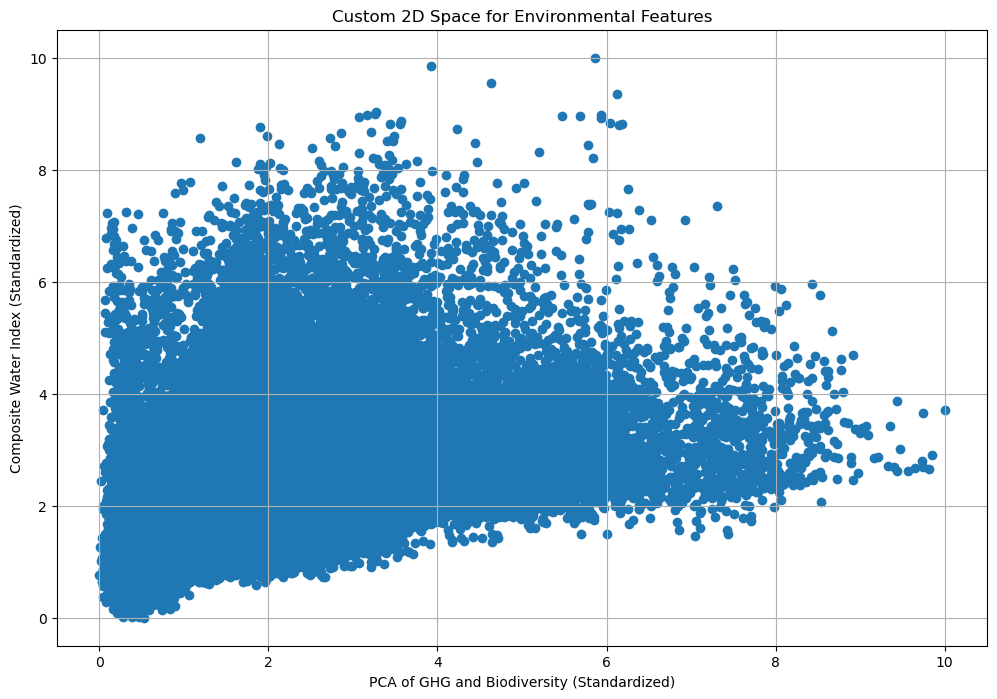

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(x_axis_scaled, y_axis_scaled)
plt.title('Custom 2D Space for Environmental Features')
plt.xlabel('PCA of GHG and Biodiversity (Standardized)')
plt.ylabel('Composite Water Index (Standardized)')
plt.grid(True)
plt.show()


### What if 1000 Monte Carlo iterations are directly labeled as a data point?  
This theoretically will not be affected by too many samples.

In [41]:
# Group according to grouping features and calculate the average
features_to_average = [
    'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut',
    'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid'
]
grouped_data = df_selected.groupby('grouping')[features_to_average].mean()

grouped_data = grouped_data.reset_index()
grouped_data

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid
0,fish_female_20-29,4.902947,6.489031,17131.963352,20.985464,0.842864,0.322486,248.135212,759.237211,22.770956
1,fish_female_30-39,4.942664,6.515886,17652.628540,20.948442,0.836500,0.321971,249.827684,759.629613,23.257771
2,fish_female_40-49,4.927040,6.540682,17729.964756,20.713798,0.841106,0.320413,252.846922,748.488755,23.470170
3,fish_female_50-59,4.944320,6.566172,18446.193259,20.989284,0.834881,0.323892,246.789912,788.932276,23.652474
4,fish_female_60-69,5.103823,6.866635,18922.366831,21.569322,0.879670,0.336023,258.645759,819.856604,24.455240
...,...,...,...,...,...,...,...,...,...,...
67,veggie_male_30-39,4.807758,6.787163,16603.476202,18.988080,0.811991,0.316326,266.148897,594.307015,22.864091
68,veggie_male_40-49,4.610379,6.610474,16477.661724,18.275813,0.764687,0.304605,251.351926,576.240665,21.866199
69,veggie_male_50-59,4.455095,6.522068,16333.409315,17.619071,0.733031,0.299523,244.248429,559.640001,21.186608
70,veggie_male_60-69,4.444844,6.628730,16725.207750,17.543012,0.738550,0.305724,248.603854,566.825960,21.321332


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select data column
grouped_data_numeric = grouped_data.select_dtypes(include=[np.number])

scaler = StandardScaler()
grouped_data_scaled = scaler.fit_transform(grouped_data_numeric)

pca = PCA(n_components=1)
principal_component_1d = pca.fit_transform(grouped_data_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1'], index=grouped_data_numeric.columns)
print(loadings)

Explained variance ratio: [0.95265284]
                    PC1
mean_ghgs      0.340114
mean_land      0.328403
mean_watscar   0.327388
mean_eut       0.340080
mean_ghgs_ch4  0.339504
mean_ghgs_n2o  0.336228
mean_bio       0.332901
mean_watuse    0.314048
mean_acid      0.340404


At this point we found that if each grouping is averaged and fused into a representative case, this will result in the first principal component of PCA reaching an Explained variance ratio of 0.953. This also means that we can visualize the data by reducing it to one dimension

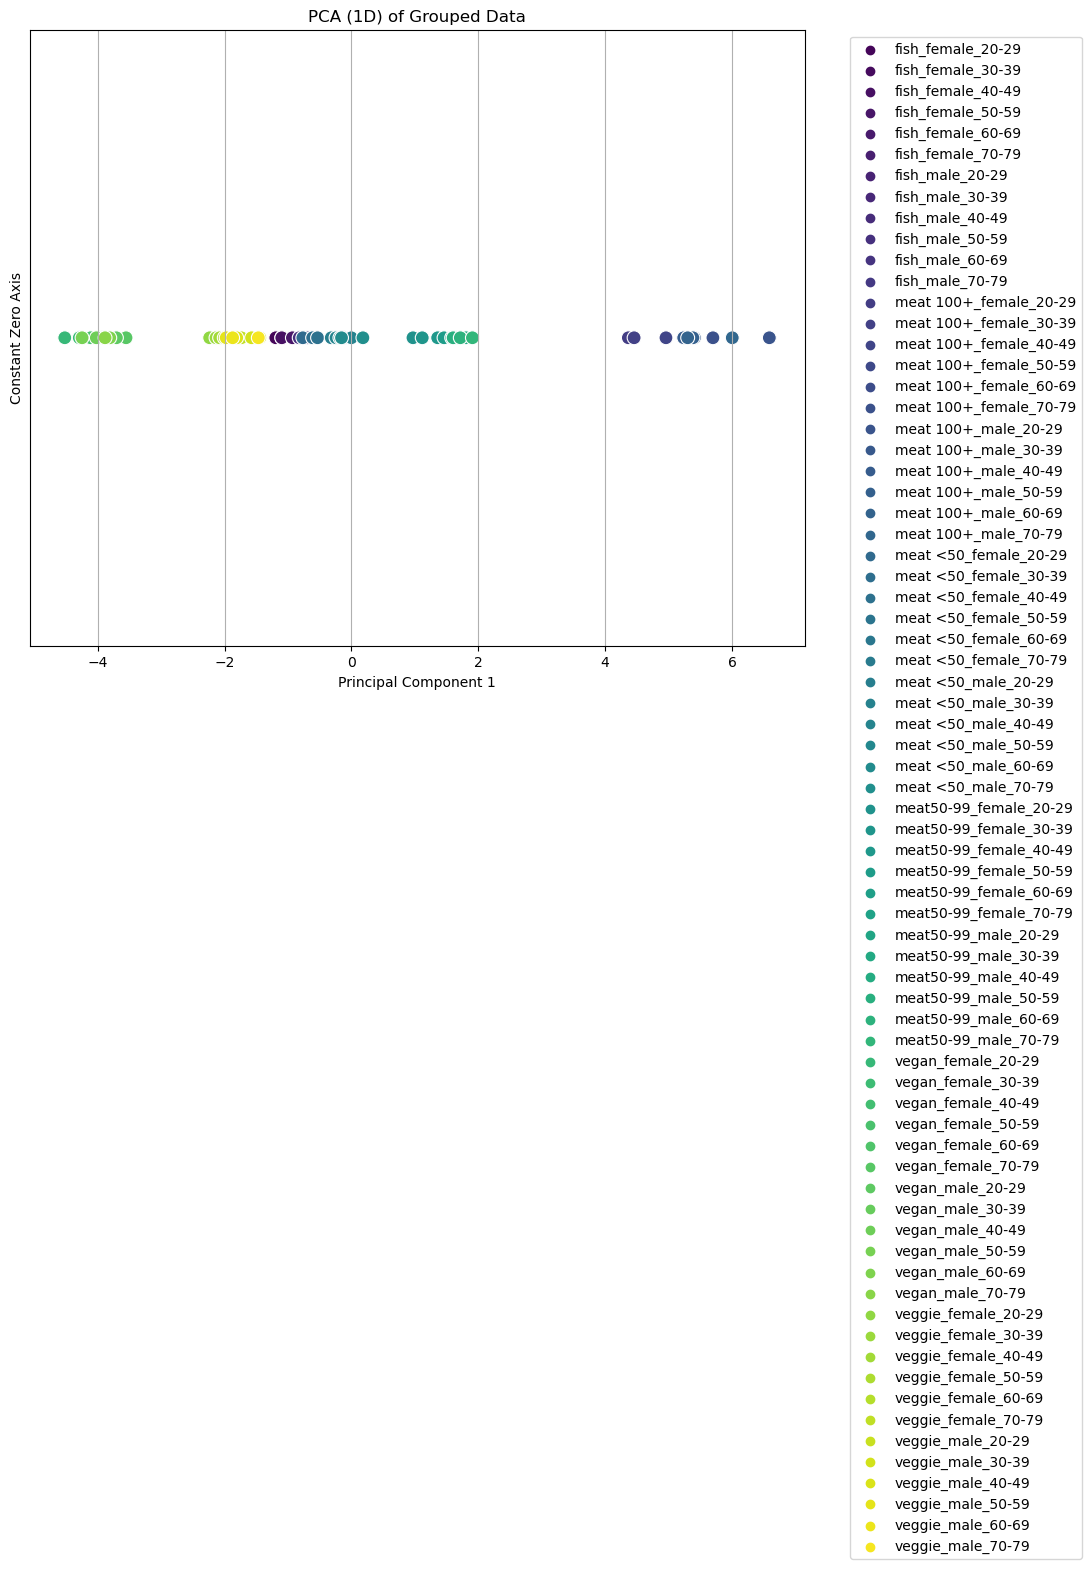

In [48]:
pca_df_1d = pd.DataFrame(data=principal_component_1d, columns=['Principal Component 1'])
pca_df_1d['grouping'] = grouped_data['grouping'] 

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y=[0]*len(pca_df_1d), hue='grouping', data=pca_df_1d, palette="viridis", s=100)
plt.title('PCA (1D) of Grouped Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Constant Zero Axis')
plt.yticks([]) 
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [50]:
# Select data column
grouped_data_numeric = grouped_data.select_dtypes(include=[np.number])

scaler = StandardScaler()
grouped_data_scaled = scaler.fit_transform(grouped_data_numeric)

pca = PCA(n_components=2)
principal_component_1d = pca.fit_transform(grouped_data_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1',"PC2"], index=grouped_data_numeric.columns)
print(loadings)

Explained variance ratio: [0.95265284 0.03019169]
                    PC1       PC2
mean_ghgs      0.340114 -0.163229
mean_land      0.328403 -0.495314
mean_watscar   0.327388  0.274224
mean_eut       0.340080  0.011820
mean_ghgs_ch4  0.339504 -0.126592
mean_ghgs_n2o  0.336228 -0.307580
mean_bio       0.332901  0.110580
mean_watuse    0.314048  0.727715
mean_acid      0.340404  0.015945


Taking the average directly according to the group can solve the problem of too many cases. However, if reducing it to one dimension is not conducive to visualization, and if it is reduced to 2 dimensions, the Y-axis is not interpretable, so the method of averaging by group is abandoned.

## Undersampling

### Random sampling  
Since there are 72 groups of data this time, each group has 1,000 pieces of data (1000 Monte Carlo random iterations).

In [54]:
# Sampling based on Feature: grouping
samples_per_group = 30

sampled_df = df_transformed.groupby('grouping').apply(lambda x: x.sample(n=samples_per_group, random_state=1)).reset_index(drop=True)

sampled_df

,PCA_GHG_Bio,Composite_Water,grouping,sex,diet_group,age_group
0,0.758879,1.022557,fish_female_20-29,female,fish,20-29
1,1.733402,2.157166,fish_female_20-29,female,fish,20-29
2,3.208844,2.268300,fish_female_20-29,female,fish,20-29
3,1.259611,2.301528,fish_female_20-29,female,fish,20-29
4,2.195169,1.870837,fish_female_20-29,female,fish,20-29
...,...,...,...,...,...,...
2155,2.525888,2.024598,veggie_male_70-79,male,veggie,70-79
2156,1.084727,3.348686,veggie_male_70-79,male,veggie,70-79
2157,2.406125,1.625206,veggie_male_70-79,male,veggie,70-79
2158,1.295380,1.922612,veggie_male_70-79,male,veggie,70-79


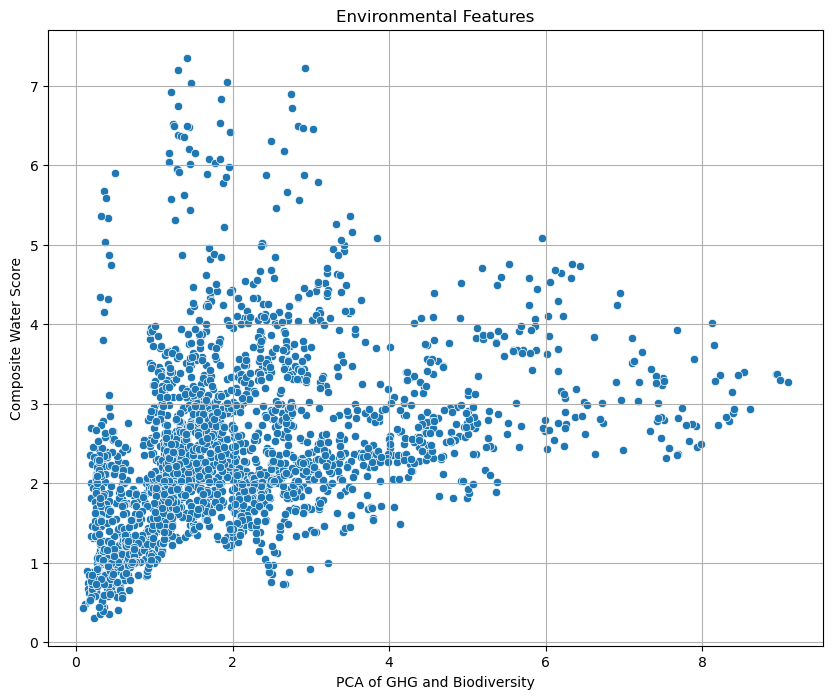

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_df, x='PCA_GHG_Bio', y='Composite_Water')

plt.title('Environmental Features')
plt.xlabel('PCA of GHG and Biodiversity')
plt.ylabel('Composite Water Score')
plt.grid(True)
plt.show()

## Overall analysis

In [56]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r'C:\Users\yang\transformed_0_10_beau_data.csv'

df1 = pd.read_csv(file_path)

df1

,PCA_GHG_Bio,Composite_Water,grouping,sex,diet_group,age_group
0,2.392,1.920,fish_female_20-29,female,fish,20-29
1,2.373,2.101,fish_female_30-39,female,fish,30-39
2,2.239,2.171,fish_female_40-49,female,fish,40-49
3,2.076,2.333,fish_female_50-59,female,fish,50-59
4,2.220,2.537,fish_female_60-69,female,fish,60-69
...,...,...,...,...,...,...
71995,3.271,1.606,veggie_male_30-39,male,veggie,30-39
71996,2.951,1.496,veggie_male_40-49,male,veggie,40-49
71997,2.709,1.296,veggie_male_50-59,male,veggie,50-59
71998,2.760,1.221,veggie_male_60-69,male,veggie,60-69


Calculate the average **GHG_Bio score** under different sex and diet_group

In [62]:
averages = df1.groupby(['sex', 'diet_group'])['PCA_GHG_Bio'].mean()
std = df1.groupby(['sex', 'diet_group'])['PCA_GHG_Bio'].std()

print("===============AVERAGE=================")
print(averages)
print("===================STD=================")
std

===============AVERAGE=================
sex     diet_group
female  fish          1.598681
        meat          2.589289
        meat100       4.158473
        meat50        1.869990
        vegan         0.427957
        veggie        1.395871
male    fish          1.737791
        meat          2.743515
        meat100       4.393487
        meat50        2.004757
        vegan         0.435955
        veggie        1.497202
Name: PCA_GHG_Bio, dtype: float64
===================STD=================


sex     diet_group
female  fish          0.547078
        meat          0.729083
        meat100       1.426065
        meat50        0.569783
        vegan         0.200668
        veggie        0.553912
male    fish          0.566508
        meat          0.753020
        meat100       1.392614
        meat50        0.588412
        vegan         0.195779
        veggie        0.560237
Name: PCA_GHG_Bio, dtype: float64

**The overall visualization here is done on other software**

## For Water Score


In [69]:
# 计算不同sex和diet_group下的PCA_GHG_Bio平均数
averages = df.groupby(['sex', 'diet_group'])['Composite_Water'].mean()
std = df.groupby(['sex', 'diet_group'])['Composite_Water'].std()
# 打印结果
print(averages)
std

sex     diet_group
female  fish          2.563311
        meat          2.830737
        meat100       3.377618
        meat50        2.502623
        vegan         1.560480
        veggie        1.898865
male    fish          2.735524
        meat          2.884348
        meat100       3.502528
        meat50        2.561001
        vegan         1.651668
        veggie        2.037713
Name: Composite_Water, dtype: float64


sex     diet_group
female  fish          0.919598
        meat          0.974206
        meat100       1.031989
        meat50        0.902346
        vegan         0.870803
        veggie        0.752574
male    fish          0.981235
        meat          0.945869
        meat100       1.021234
        meat50        0.893914
        vegan         0.918719
        veggie        0.804217
Name: Composite_Water, dtype: float64

In [72]:
averages = df1.groupby([ 'diet_group'])['Composite_Water'].mean()
std = df1.groupby([ 'diet_group'])['Composite_Water'].std()
# 打印结果
print(averages)
std

diet_group
fish       2.669230
meat       2.875655
meat100    3.466434
meat50     2.548878
vegan      1.638187
veggie     1.996436
Name: Composite_Water, dtype: float64


diet_group
fish       0.960026
meat       0.958000
meat100    1.030797
meat50     0.899576
vegan      0.920904
veggie     0.799723
Name: Composite_Water, dtype: float64

In [75]:
composite_water_averages = {
    'fish': 2.66923,
    'meat': 2.87565,
    'meat100': 3.46643,
    'meat50': 2.54887,
    'vegan': 1.63818,
    'veggie': 1.99643
}

composite_water_std_devs = {
    'fish': 0.96002,
    'meat': 0.95800,
    'meat100': 1.03079,
    'meat50': 0.89957,
    'vegan': 0.92090,
    'veggie': 0.79972
}

# 使用正确的字典名
result_plus_std = {diet: round(composite_water_averages[diet] + composite_water_std_devs[diet], 4) 
                   for diet in composite_water_averages}
result_minus_std = {diet: round(composite_water_averages[diet] - composite_water_std_devs[diet], 4) 
                    for diet in composite_water_averages}

result_plus_std, result_minus_std

({'fish': 3.6293,
  'meat': 3.8336,
  'meat100': 4.4972,
  'meat50': 3.4484,
  'vegan': 2.5591,
  'veggie': 2.7961},
 {'fish': 1.7092,
  'meat': 1.9176,
  'meat100': 2.4356,
  'meat50': 1.6493,
  'vegan': 0.7173,
  'veggie': 1.1967})

**The overall visualization here is done on other software**

## Group_analysis
Use 3 and 6 as the classification basis for the X-axis and Y-axis respectively.  
Divide the entire X-axis and Y-axis into three parts: **low** (0-3),**medium** (3-6) and **high** (6-10)

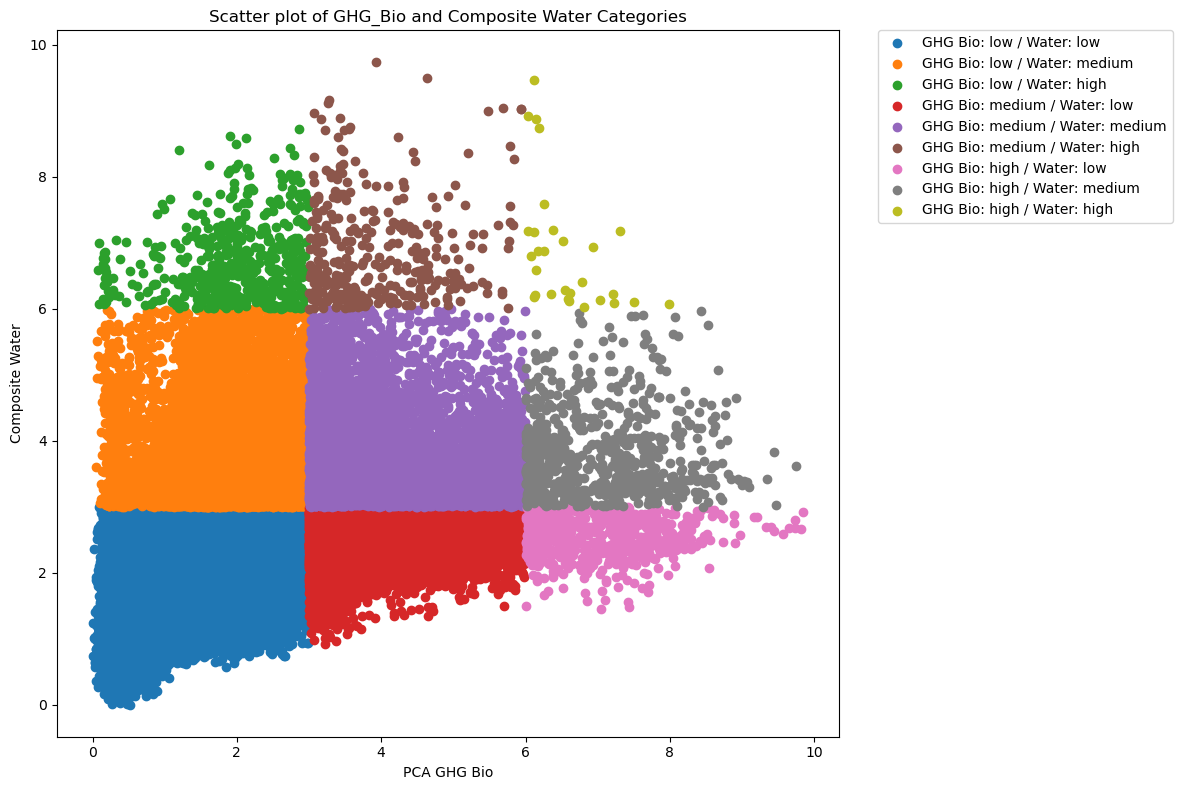

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# df1 = pd.read_csv(file_path)

x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], right=False)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], right=False)

plt.figure(figsize=(12, 8))  
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        plt.scatter(subset['PCA_GHG_Bio'], subset['Composite_Water'], label=f'GHG Bio: {x_label} / Water: {y_label}')

plt.title('Scatter plot of GHG_Bio and Composite Water Categories')
plt.xlabel('PCA GHG Bio')
plt.ylabel('Composite Water')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()

plt.show()


Encountered the same problem again, too many scattered points
#### Try Hexagon box plot? Failed again

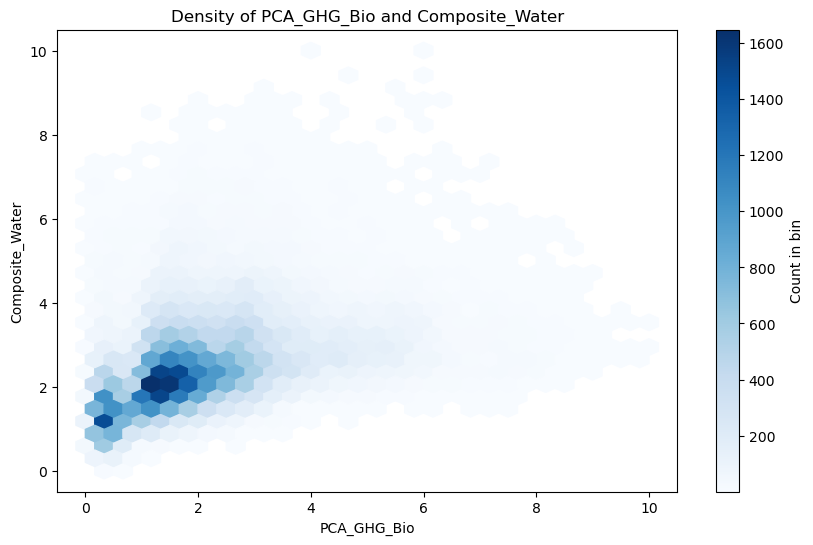

In [80]:
plt.figure(figsize=(10, 6))

plt.hexbin(df1['PCA_GHG_Bio'], df1['Composite_Water'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

plt.title('Density of PCA_GHG_Bio and Composite_Water')
plt.xlabel('PCA_GHG_Bio')
plt.ylabel('Composite_Water')

plt.show()

#### Try within-group average rather than perfect average?  (Still failed)

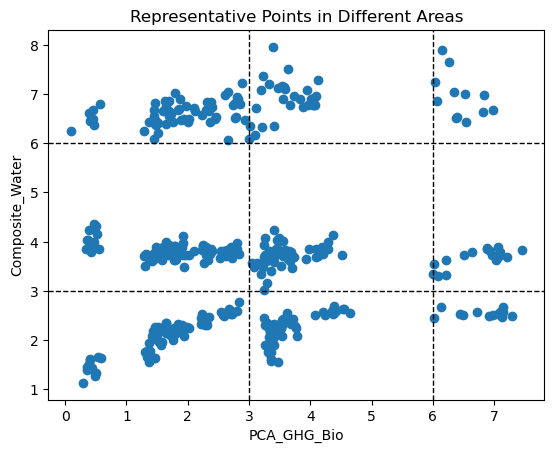

In [82]:
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

df1['x_bin'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=False)
df1['y_bin'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=False)

# Initialize the representative point list
representative_points = []

# Traverse each area
for x in range(3):  # 0 (low), 1 (medium), 2 (high)
    for y in range(3):
        area_subset = df1[(df1['x_bin'] == x) & (df1['y_bin'] == y)]
        for group in area_subset['grouping'].unique():
            group_subset = area_subset[area_subset['grouping'] == group]
            
            if len(group_subset) >= 30:
                sample_points = group_subset.sample(30)
                representative_point = sample_points[['PCA_GHG_Bio', 'Composite_Water']].mean()
            else:
                representative_point = group_subset[['PCA_GHG_Bio', 'Composite_Water']].mean()
            
            representative_point['grouping'] = group  # Add the grouping for the plot
            representative_points.append(representative_point)

df_representative = pd.DataFrame(representative_points)

plt.scatter(df_representative['PCA_GHG_Bio'], df_representative['Composite_Water'])

# Add area dividing line
for line in [3, 6]:  
    plt.axvline(x=line, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=line, color='black', linestyle='--', linewidth=1)

plt.title('Representative Points in Different Areas')
plt.xlabel('PCA_GHG_Bio')
plt.ylabel('Composite_Water')

plt.show()

## 聚类采样

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\P

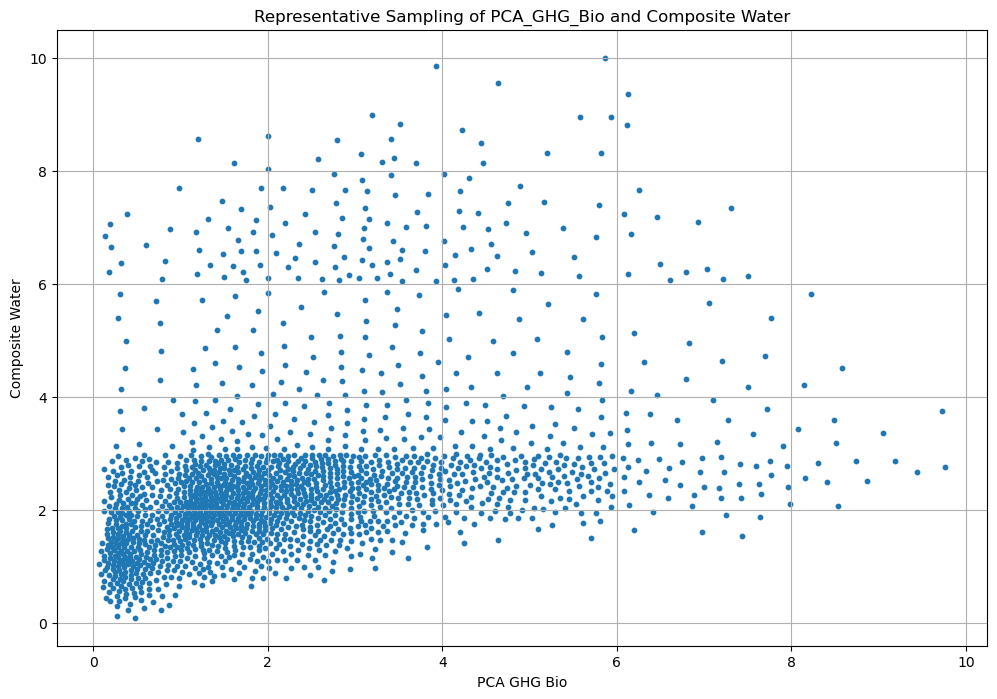

In [84]:
from sklearn.cluster import KMeans
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 为每个点分配区域
df1['x_bin'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=False)
df1['y_bin'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=False)

# 手动指定每个区域的采样数量
samples_per_area = {(0, 0): 1000, (0, 1): 100, (0, 2): 62, 
                    (1, 0): 300,  (1, 1): 100, (1, 2): 73,
                    (2, 0): 50,  (2, 1): 32, (2, 2): 15}

# 初始化空列表来存储每个区域的代表点
representative_points = []

# 遍历每个区域
for x in range(3):  # 对应 x_bins
    for y in range(3):  # 对应 y_bins
        subset = df1[(df1['x_bin'] == x) & (df1['y_bin'] == y)]
        n_samples = samples_per_area.get((x, y), len(subset))  # 获取每个区域的采样数量，默认使用区域内的点数

        if len(subset) > 0:  # 只有当区域内有数据点时才进行聚类
            kmeans = KMeans(n_clusters=min(len(subset), n_samples), random_state=0).fit(subset[['PCA_GHG_Bio', 'Composite_Water']])
            # 添加聚类中心作为代表点
            centers = kmeans.cluster_centers_
            for center in centers:
                representative_points.append({'PCA_GHG_Bio': center[0], 'Composite_Water': center[1], 'x_bin': x, 'y_bin': y})

# 将代表点转换成DataFrame
df_representative = pd.DataFrame(representative_points)

# 绘制散点图
plt.figure(figsize=(12, 8))
plt.scatter(df_representative['PCA_GHG_Bio'], df_representative['Composite_Water'], s=10)  # s是点的大小
plt.title('Representative Sampling of PCA_GHG_Bio and Composite Water')
plt.xlabel('PCA GHG Bio')
plt.ylabel('Composite Water')
plt.grid(True)
plt.show()

In [86]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 初始化一个空字典来保存结果
area_counts = {}

# 遍历每个区域，计算每个剩下的分类特征的计数
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        area = f'{x_label}_{y_label}'
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        counts = subset[['sex', 'diet_group', 'age_group']].apply(pd.Series.value_counts).fillna(0).astype(int)
        area_counts[area] = counts

# 打印出各个部分的具体个数
for area, counts in area_counts.items():
    print(f"Area {area}:\n{counts}\n")

Area low_low:
           sex  diet_group  age_group
20-29        0           0       7690
30-39        0           0       7602
40-49        0           0       7768
50-59        0           0       7697
60-69        0           0       7504
70-79        0           0       7204
female   23413           0          0
fish         0        8508          0
male     22052           0          0
meat         0        5768          0
meat100      0         735          0
meat50       0        8743          0
vegan        0       11227          0
veggie       0       10484          0

Area low_medium:
          sex  diet_group  age_group
20-29       0           0       1975
30-39       0           0       2079
40-49       0           0       1808
50-59       0           0       1882
60-69       0           0       2033
70-79       0           0       2091
female   5858           0          0
fish        0        2978          0
male     6010           0          0
meat        0        2722   

In [87]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 初始化一个空字典来保存结果
area_diet_age_distribution = {}

# 遍历每个区域，计算每个剩下的分类特征的计数
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        area = f'{x_label}_{y_label}'
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        # 按照diet_group进行分组，然后计算每个diet_group下的age_group分布
        diet_age_group_distribution = subset.groupby('diet_group')['age_group'].value_counts().unstack(fill_value=0)
        area_diet_age_distribution[area] = diet_age_group_distribution

# 打印出每个区域的diet_group下的age_group分布情况
for area, distribution in area_diet_age_distribution.items():
    print(f"Area {area} distribution:\n{distribution}\n")

Area low_low distribution:
age_group   20-29  30-39  40-49  50-59  60-69  70-79
diet_group                                          
fish         1378   1434   1495   1460   1395   1346
meat         1057    993    982    958    925    853
meat100       108    125    144    134    129     95
meat50       1562   1430   1488   1461   1427   1375
vegan        1863   1882   1890   1911   1855   1826
veggie       1722   1738   1769   1773   1773   1709

Area low_medium distribution:
age_group   20-29  30-39  40-49  50-59  60-69  70-79
diet_group                                          
fish          499    465    426    484    526    578
meat          551    512    404    402    432    421
meat100       257    332    293    301    321    256
meat50        332    448    387    399    413    431
vegan         133    112     98     89    137    151
veggie        203    210    200    207    204    254

Area low_high distribution:
age_group   20-29  30-39  40-49  50-59  60-69  70-79
diet_group  

In [88]:

# 定义分割区间
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 对'PCA_GHG_Bio'和'Composite_Water'进行分类
df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

# 计算每个区域的分类特征的个数
for x_category in ['low', 'medium', 'high']:
    for y_category in ['low', 'medium', 'high']:
        # 获取当前区域的子集
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_category) & (df1['Composite_Water_Category'] == y_category)]
        print(f"Area {x_category} x {y_category}:")

        # 计算sex, diet_group, age_group的个数
        sex_counts = subset['sex'].value_counts()
        diet_group_counts = subset['diet_group'].value_counts()
        age_group_counts = subset['age_group'].value_counts()

        print("Sex Counts:")
        print(sex_counts)
        print("Diet Group Counts:")
        print(diet_group_counts)
        print("Age Group Counts:")
        print(age_group_counts)
        print("\n")  # 添加空行以便阅读

Area low x low:
Sex Counts:
female    23413
male      22052
Name: sex, dtype: int64
Diet Group Counts:
vegan      11227
veggie     10484
meat50      8743
fish        8508
meat        5768
meat100      735
Name: diet_group, dtype: int64
Age Group Counts:
40-49    7768
50-59    7697
20-29    7690
30-39    7602
60-69    7504
70-79    7204
Name: age_group, dtype: int64


Area low x medium:
Sex Counts:
male      6010
female    5858
Name: sex, dtype: int64
Diet Group Counts:
fish       2978
meat       2722
meat50     2410
meat100    1760
veggie     1278
vegan       720
Name: diet_group, dtype: int64
Age Group Counts:
70-79    2091
30-39    2079
60-69    2033
20-29    1975
50-59    1882
40-49    1808
Name: age_group, dtype: int64


Area low x high:
Sex Counts:
male      291
female    273
Name: sex, dtype: int64
Diet Group Counts:
meat       172
fish       136
meat50     102
meat100     87
vegan       53
veggie      14
Name: diet_group, dtype: int64
Age Group Counts:
70-79    118
60-69     98


In [89]:
# 初始化一个空字典来保存结果
area_stats = {}

# 遍历每个区域，计算每个剩下的分类特征的计数以及均值和标准差
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        area = f'{x_label}_{y_label}'
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        
        # 计算性别、饮食组和年龄组的计数
        counts = subset[['sex', 'diet_group', 'age_group']].apply(pd.Series.value_counts).fillna(0).astype(int)
        
        # 计算PCA_GHG_Bio和Composite_Water的均值和标准差
        mean_pca_ghg_bio = subset['PCA_GHG_Bio'].mean()
        std_pca_ghg_bio = subset['PCA_GHG_Bio'].std()
        mean_composite_water = subset['Composite_Water'].mean()
        std_composite_water = subset['Composite_Water'].std()

        # 保存统计数据
        area_stats[area] = {
            'counts': counts,
            'mean_pca_ghg_bio': mean_pca_ghg_bio,
            'std_pca_ghg_bio': std_pca_ghg_bio,
            'mean_composite_water': mean_composite_water,
            'std_composite_water': std_composite_water
        }

# 打印出各个部分的具体个数以及均值和标准差
for area, stats in area_stats.items():
    print(f"Area {area}:")
    print("Counts:")
    print(stats['counts'])
    print("Mean PCA GHG Bio:", stats['mean_pca_ghg_bio'])
    print("Std PCA GHG Bio:", stats['std_pca_ghg_bio'])
    print("Mean Composite Water:", stats['mean_composite_water'])
    print("Std Composite Water:", stats['std_composite_water'])
    print("\n")

Area low_low:
Counts:
           sex  diet_group  age_group
20-29        0           0       7690
30-39        0           0       7602
40-49        0           0       7768
50-59        0           0       7697
60-69        0           0       7504
70-79        0           0       7204
female   23413           0          0
fish         0        8508          0
male     22052           0          0
meat         0        5768          0
meat100      0         735          0
meat50       0        8743          0
vegan        0       11227          0
veggie       0       10484          0
Mean PCA GHG Bio: 1.4168004618937644
Std PCA GHG Bio: 0.7549736256816336
Mean Composite Water: 1.945836181678214
Std Composite Water: 0.5870250505660798


Area low_medium:
Counts:
          sex  diet_group  age_group
20-29       0           0       1975
30-39       0           0       2079
40-49       0           0       1808
50-59       0           0       1882
60-69       0           0       2033
70-79 

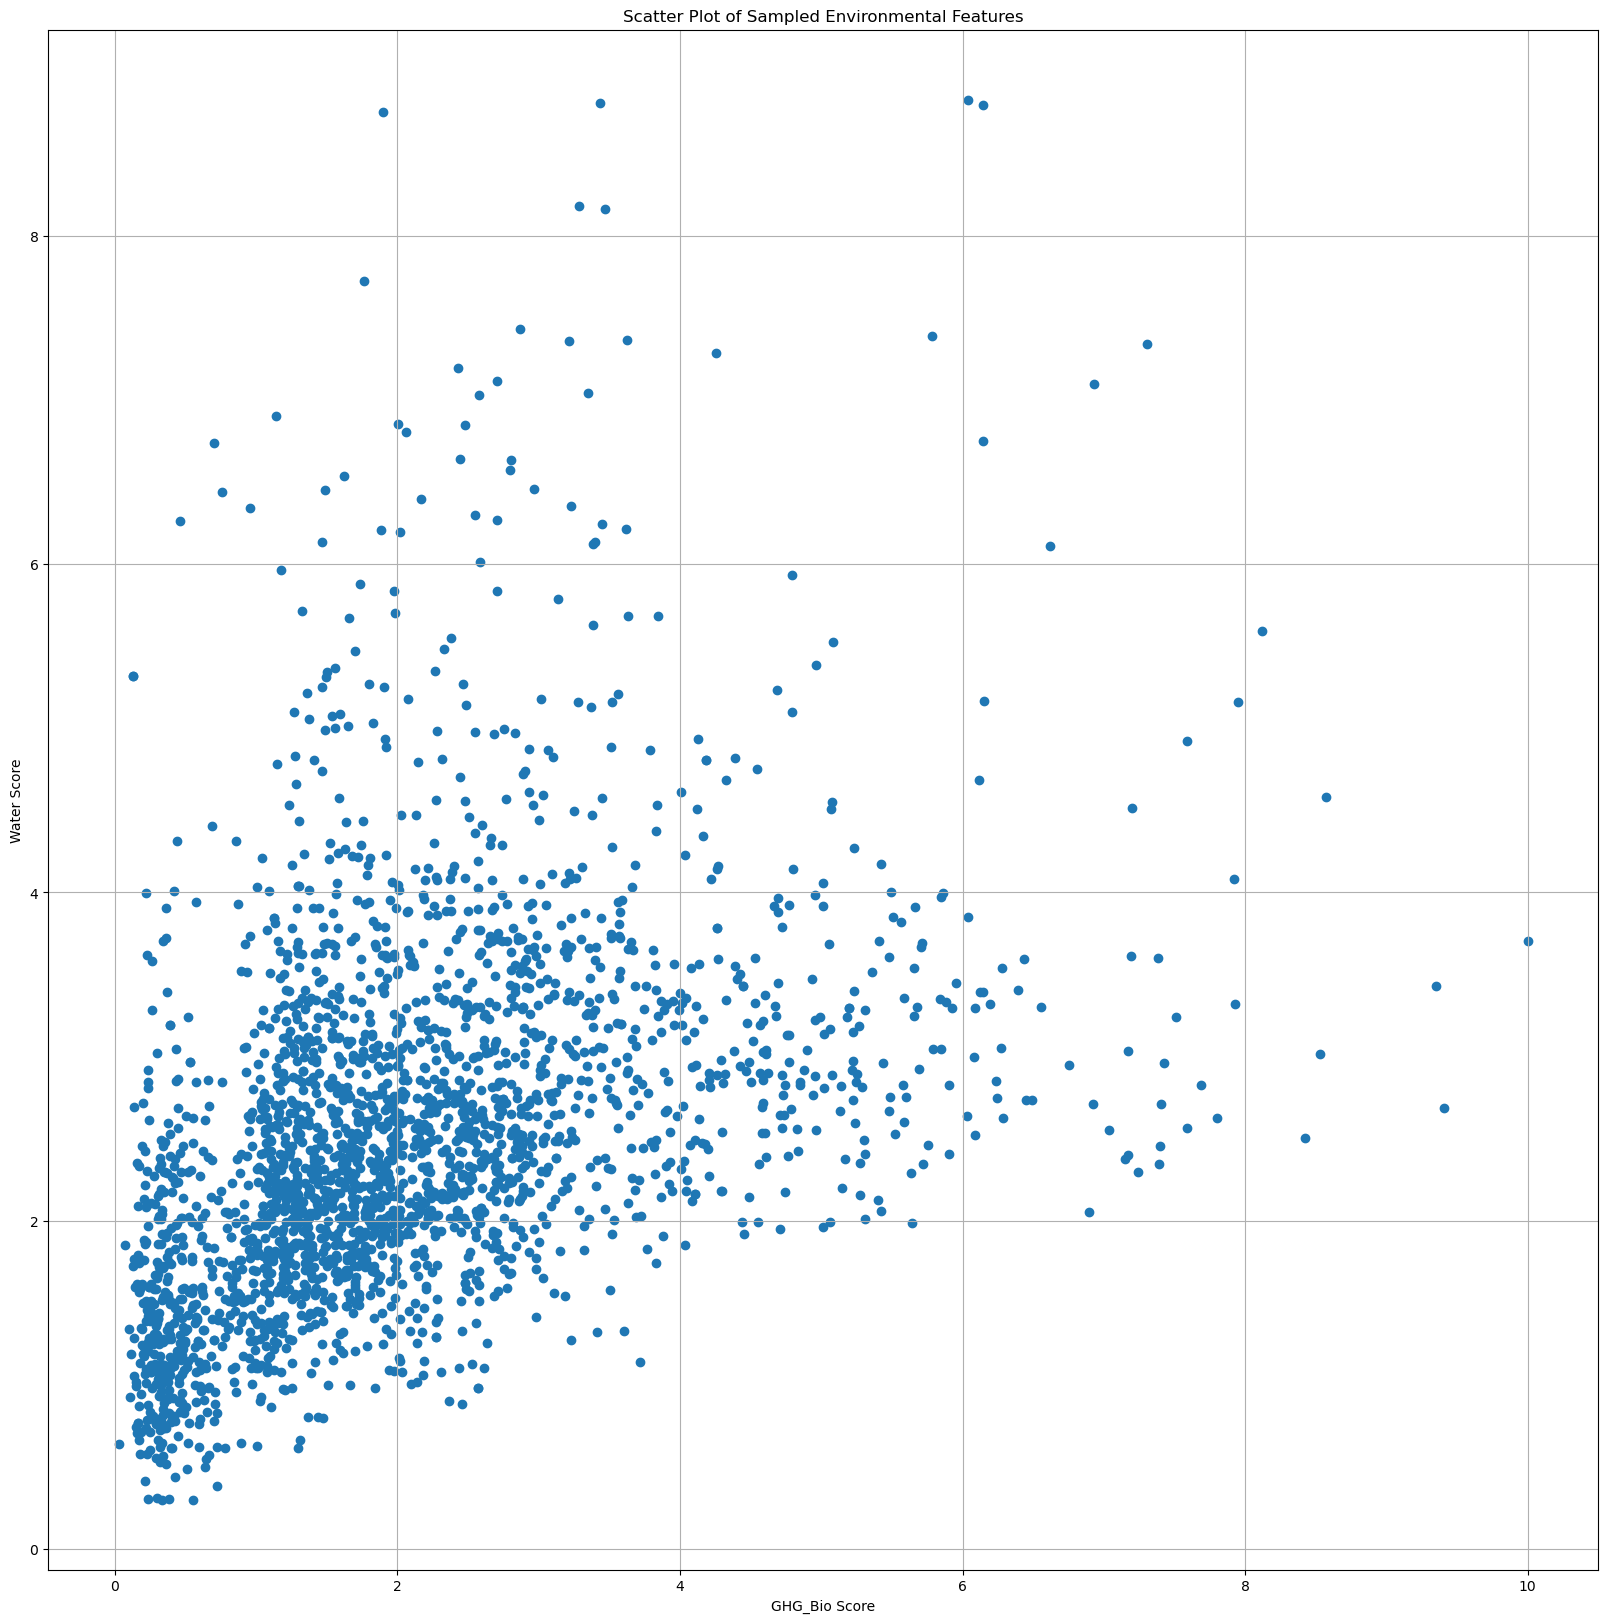

In [90]:
# 设置最小样本数和每个grouping类别要抽取的样本数
min_samples_per_bin = 5
samples_per_group = 35

# 使用groupby和sample对每个区域和grouping进行抽样
# 先确保每个区域至少有min_samples_per_bin个样本
sampled_df = pd.DataFrame()
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
        if len(subset) > min_samples_per_bin:
            sampled_subset = subset.sample(n=min_samples_per_bin, random_state=1)
            sampled_df = pd.concat([sampled_df, sampled_subset])
        else:
            sampled_df = pd.concat([sampled_df, subset])

# 然后对剩下的数据进行随机抽样
additional_samples = df1[~df1.index.isin(sampled_df.index)].groupby('grouping').sample(n=samples_per_group, random_state=1, replace=True)

# 合并最初的抽样数据和额外的抽样数据
sampled_df = pd.concat([sampled_df, additional_samples]).reset_index(drop=True)

# 创建一个基础散点图
plt.figure(figsize=(20, 20))
plt.scatter(sampled_df['PCA_GHG_Bio'], sampled_df['Composite_Water'])

# 添加标题和轴标签
plt.title('Scatter Plot of Sampled Environmental Features')
plt.xlabel("GHG_Bio Score")
plt.ylabel('Water Score')
plt.grid(True)

# 显示图表
plt.show()

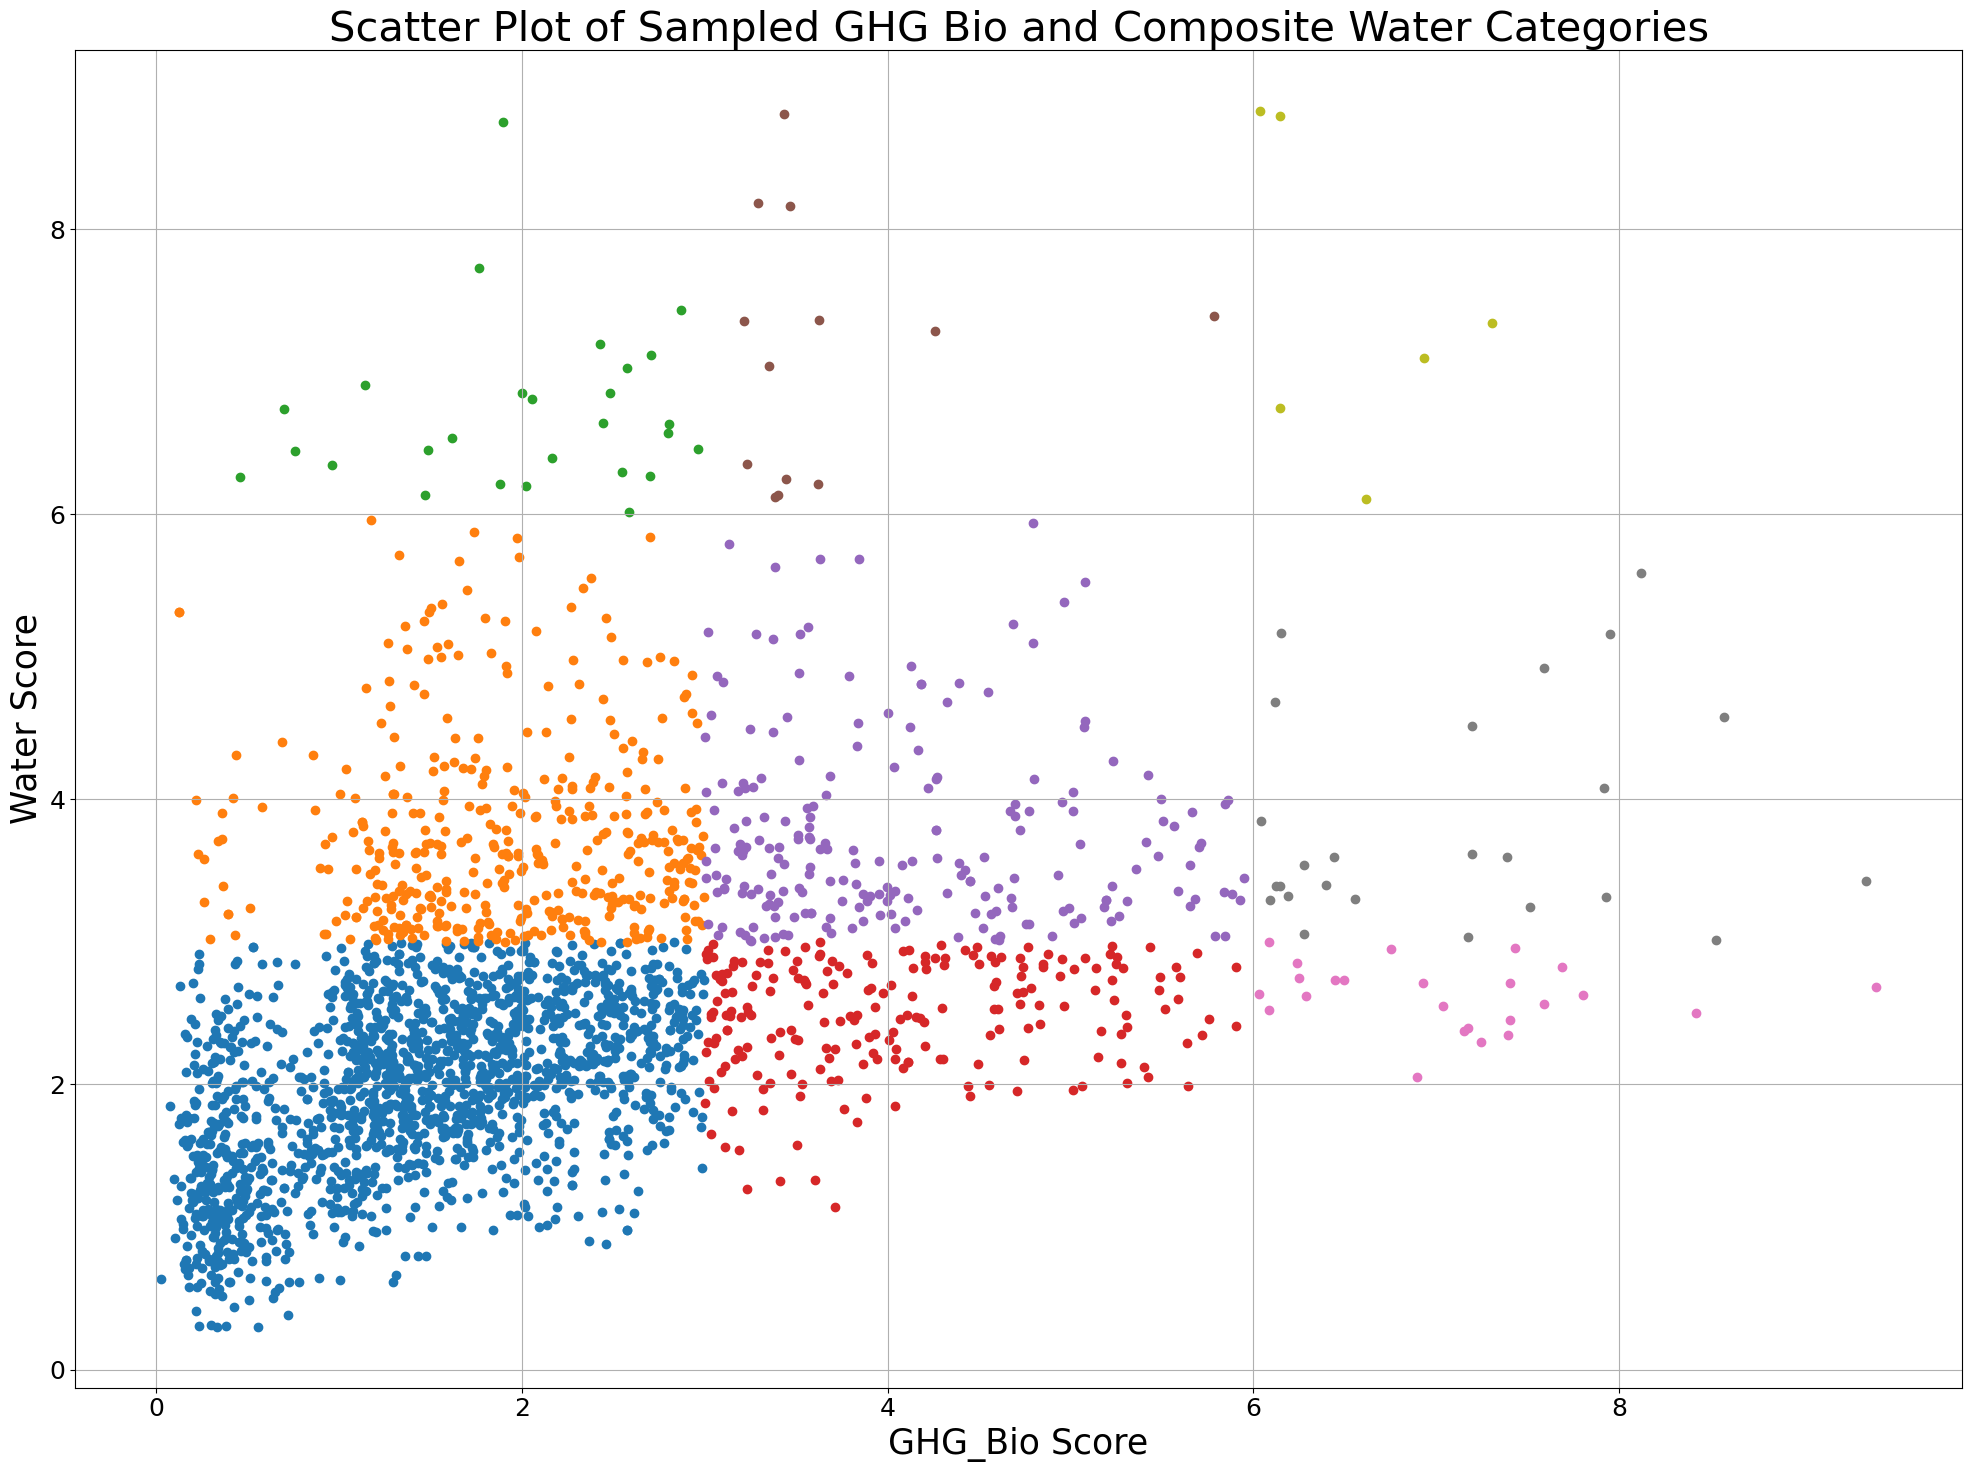

In [91]:
# 定义分割边界
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

# 分割数据
sampled_df['PCA_GHG_Bio_Category'] = pd.cut(sampled_df['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], right=False)
sampled_df['Composite_Water_Category'] = pd.cut(sampled_df['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], right=False)

# 设置字体大小
plt.rcParams.update({'font.size': 16})  # 更改默认的字体大小

# 创建散点图
plt.figure(figsize=(20, 15))
for x_label in ['low', 'medium', 'high']:
    for y_label in ['low', 'medium', 'high']:
        subset = sampled_df[(sampled_df['PCA_GHG_Bio_Category'] == x_label) & (sampled_df['Composite_Water_Category'] == y_label)]
        plt.scatter(subset['PCA_GHG_Bio'], subset['Composite_Water'], label=f'GHG Bio: {x_label} / Water: {y_label}')

# 添加标题和标签
plt.title('Scatter Plot of Sampled GHG Bio and Composite Water Categories', fontsize=30)
plt.xlabel('GHG_Bio Score', fontsize=25)
plt.ylabel('Water Score', fontsize=25)

# 设置刻度大小
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True)

# 添加图例，调整图例字体大小
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=16)

# 调整子图参数或使用tight_layout自动调整，以防止图例和标签被剪切
plt.tight_layout()

# 显示图表
plt.show()

#### Works great, save data again to df_area1,df_area2....df_area9, represent low_low to high_high

In [92]:
# Define split boundaries
x_bins = [0, 3, 6, 10]
y_bins = [0, 3, 6, 10]

df1['PCA_GHG_Bio_Category'] = pd.cut(df1['PCA_GHG_Bio'], bins=x_bins, labels=['low', 'medium', 'high'], include_lowest=True)
df1['Composite_Water_Category'] = pd.cut(df1['Composite_Water'], bins=y_bins, labels=['low', 'medium', 'high'], include_lowest=True)

area_diet_age_distribution = {}

# Iterate through each region and calculate the count of each remaining categorical feature
for i, (x_label, y_label) in enumerate([('low', 'low'), ('low', 'medium'), ('low', 'high'),
                                        ('medium', 'low'), ('medium', 'medium'), ('medium', 'high'),
                                        ('high', 'low'), ('high', 'medium'), ('high', 'high')], start=1):
    area = f'{x_label}_{y_label}'
    subset = df1[(df1['PCA_GHG_Bio_Category'] == x_label) & (df1['Composite_Water_Category'] == y_label)]
    # Group according to diet_group, and then calculate the age_group distribution under each diet_group
    diet_age_group_distribution = subset.groupby('diet_group')['age_group'].value_counts().unstack(fill_value=0)
    area_diet_age_distribution[area] = diet_age_group_distribution
    
    df_to_save = diet_age_group_distribution.stack().reset_index()
    df_to_save.columns = ['diet_group', 'age_group', 'value']
    
    df_to_save.to_csv(f'df_area{i}.csv', index=False)

print("All area distribution data have been saved to CSV files.")

All area distribution data have been saved to CSV files.


# Step3: An attempt to further Visualization

## Static Treemap proves to be a failure, So we decided not to use python and instead used dycharts to draw dynamic Treemaps
The static Treemap displays age and grouping directly, which is not the effect we want.

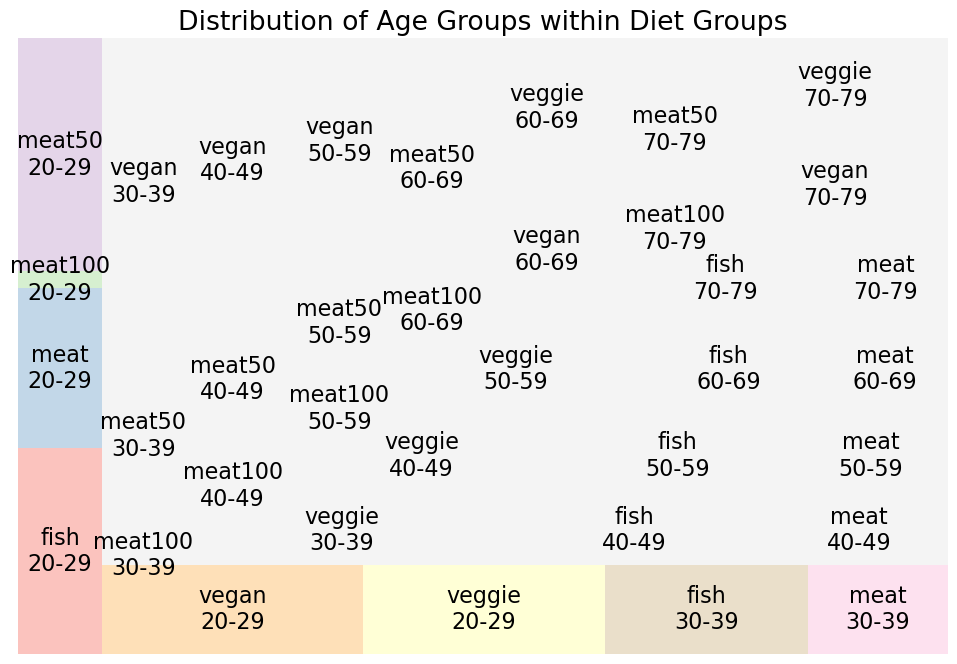

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify  # 

data = {
    'age_group': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
    'fish': [1390, 1450, 1506, 1470, 1413, 1366],
    'meat': [1077, 1003, 990, 974, 944, 865],
    'meat100': [116, 128, 151, 137, 133, 102],
    'meat50': [1574, 1443, 1499, 1468, 1445, 1397],
    'vegan': [1864, 1890, 1898, 1916, 1867, 1841],
    'veggie': [1728, 1751, 1776, 1784, 1782, 1725]
}
df = pd.DataFrame(data)

df = df.set_index('age_group').stack().reset_index()
df.columns = ['age_group', 'diet_group', 'value']

plt.figure(figsize=(12, 8))
colors = plt.cm.Pastel1(range(len(df)))
squarify.plot(sizes=df['value'], label=df['diet_group'] + '\n' + df['age_group'], color=colors, alpha=0.8)
plt.title('Distribution of Age Groups within Diet Groups')
plt.axis('off') 
plt.show()